# NLP similarity and methods - first exploration of the vector space. 

## Content: 
- Readme
- Setup, tests
- Tokenization
- Doc strings
- Comprehensions
- On the numerical representation of natural language
- Bag of word
- [Dot product](#dot-product)
- Euclidean distance
- Length Normalization
- Cosine similarity
- TF-IDF
- Mini project: Finding the most similar document using cosine similarity and TF-IDF
- Mini project revisited: doing the same, just with professional libraries.
- About, credits, where to learn more, and so on.

TODO add something about the L2 norm somewhere

In [1]:
# Run this cell to make the math formulas larger.

from IPython.display import display, HTML

display(HTML('''
<style>
  .MathJax_Display, .MathJax {
    font-size: 170% !important;
  }
</style>
'''))

# thanks to chatgpt for the css 


# Readme

This is the first notebook of what I hope to be a series of notebooks, covering the curriculum of a course at UiO, in2110. 

In this notebook, we'll go through some of the basic concepts of algoirthms, and after that, we'll end with a small final project, demonstrating the algoritms.

The final project comes in two different versions, one using my own implementations and one using more professional libraries. The reason is that this will both teach me how to implement the algoirthms myself, but also how to use the standard libraries for these kind of tasks properly. 

I'll also go through a few topics that aren't directly relevant to NLP, but still quite useful (for instance, doc strings, comprehensions). 


# Setup and tests

## Requirements.txt
See requirements.txt

## Folder structure
TODO 

## How to run

- Create venv (recommended)

```bash
python -m venv NLP-venv
source ./NLP-venv/bin/activate
pip install -r requirements.txt

```
Install jupyer notebook: 
Follow instructions here: <link>

run jupyer notebook NLP-notebook.ipynb from root 


# Tokenization


A token is an occurence of a word in a document. A type is a unique word in a document. A lemma is the dictionary form of word in a document. 

So if we look at the document "I have a book, you have two books, she has a book", we'll get. 

"I have a book, you have two books, she has a book", we'll get: 

Tokens: ['i', 'have', 'a', 'book', 'you', 'have', 'two', 'books', 'she', 'has', 'a', 'book'], num of tokens: 12


Types: {'books', 'you', 'two', 'a', 'she', 'book', 'has', 'i', 'have'}, num of types: 9


Lemmas: {'you', 'two', 'a', 'she', 'book', 'i', 'have'}, num of lemmas: 7


In [2]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

# uncomment these to install spacy and download the English model. 

""" Quick demo of extracting tokens, types and lemmas using spacy""" 

import spacy

# Load the small English model (download with: python -m spacy download en_core_web_sm if needed)
nlp = spacy.load("en_core_web_sm")

document = "I have a book, you have two books, she has a book"

# Process the document
doc = nlp(document)

# Tokens (lowercased and alphanumeric only)
tokens = [token.text.lower() for token in doc if token.is_alpha]
print(f"Tokens: {tokens}, num of tokens: {len(tokens)}")

# Types (unique words)
types = set(tokens)
print(f"Types: {types}, num of types: {len(types)}")

# Lemmas (also lowercased and alphanumeric)
lemmas = {token.lemma_.lower() for token in doc if token.is_alpha}
print(f"Lemmas: {lemmas}, num of lemmas: {len(lemmas)}")


Tokens: ['i', 'have', 'a', 'book', 'you', 'have', 'two', 'books', 'she', 'has', 'a', 'book'], num of tokens: 12
Types: {'you', 'have', 'has', 'two', 'books', 'i', 'she', 'book', 'a'}, num of types: 9
Lemmas: {'you', 'have', 'two', 'i', 'she', 'book', 'a'}, num of lemmas: 7


# Doc-strings 


A doc string is just a way to indicate what a method does in a clear way. There are a few reasons to use them: 

- It helps you think. When you indicate the types of the arguments and the return value, it is much easier to not get lost while you're writing code.
- If you use an IDE, you can often hover over the name of a method, and then see the args, type of args, return type and a summary of the method, provided that you have formatted the doc string properly. 

It does not, as far as I know, help with performance. 
Not does it enforce types in the method by itself, it's just a way to help you and all the others who read and work with the code think and to get better tooltips in the IDE. If you're writing code that will be used by other people, I think it should be considered corteous to use at least some kind of docstring. And even if you just code for yourself, it is a very generous gesture for future-you. 

The basic syntax is the following: 

```python
def method_name(arg_name1: arg_type1, arg_name2: arg_type2) -> returnType:
    """Summary.

    [Optional] More about the method.

    Args:
        arg_name1 (arg_type1): Description of arg_name1.
        arg_name2 (arg_type2): Description of arg_name2.

    Returns:
        returnType: Description of the return object.

    Raises:
        ExceptionType: When it should raise this exception.
    """
```
You can read more about typehints here: https://docs.python.org/3/library/typing.html

Here is an example: 


    

In [3]:

# Without docstring
def add_2(num): 
    return num + 2

# With minimal, working docstring
def add_2_minimal_docstring(num : int) -> int: 
    """Takes a number and increments it by 2"""
    return num + 2 

# With a more formal docstring

def add_2_docstring(num : int) -> int: 
    """ Takes a number and increments it by 2. 

    Args: 
        num (int): the number to be incremented.
    Returns: 
        int: the incremented number. 
    
    """
    return num + 2

# All of the functions do the same, and none of them will validate the input. 

#Example use. 

print(add_2_docstring(4)) # prints 6

#print(add_2_docstring("dog")) # crashes, TypeError.

# And you can get the doc string by running this: 
help(add_2_docstring)

6
Help on function add_2_docstring in module __main__:

add_2_docstring(num: int) -> int
    Takes a number and increments it by 2.

    Args:
        num (int): the number to be incremented.
    Returns:
        int: the incremented number.



# Comprehensions

Comprehensions are a way to create lists, sets, dictionaries and generators in a more pythonic and concise way. 

The basic syntax is [expression for variable in iterable if condition]


While comprehensions aren't really a part of NLP in itself, it is so commonly used, both in my code and in others, that I 
think that it should be included in this notebook.

Example: 


In [4]:
names = ["Bob", "Lars", "Celine"]

# lower only names beginning with B, include all names. 
names = [name.lower() if name[0] == "B" else name for name in names]
print(names)

# only include names longer than 3 chars

names_2 = [name for name in names if len(name) > 3]
print(names_2)

# We see here that the syntax in comprehensions using conditions can varry a bit, not sure why. 

['bob', 'Lars', 'Celine']
['Lars', 'Celine']


In [5]:
# Flip a dictionary: 

phone_book = {

    "Bob": 12345678,
    "Lars" : 22222222, 
    "Celine" : 33333333
    
}

number_to_name_dict = {number : name for name, number in phone_book.items()}

print(number_to_name_dict)

# Notice that there is a possibility of losing data here, if two names are linked to the same number. 

{12345678: 'Bob', 22222222: 'Lars', 33333333: 'Celine'}


In [6]:
# Create a set from a list: 

fruit_list = ["apple", "apple", "banana"]

fruit_set = {fruit for fruit in fruit_list}
print(fruit_set)

# notice the different brackets and how they affect the type of the comprehension. 

{'banana', 'apple'}


In [7]:
# You can also do nested comprehensions, for instance to flatten a matrix. 

matrix = [[1, 2, 3],
          [2, 3, 4], 
          [3, 4, 5]]

flat_matrix = [v for vector in matrix for v in vector]
print(f"flat matrix: {flat_matrix}")

# or again, to return a set from a matrix: 

flat_set = {v for vector in matrix for v in vector}
print(f"flat set: {flat_set}")


flat matrix: [1, 2, 3, 2, 3, 4, 3, 4, 5]
flat set: {1, 2, 3, 4, 5}


In [8]:
import time 
import sys 
# Generators 

# Generators are iterables that yield objects one at the time when they are needed. I.e, they are a way of avoiding storing a large 
# iterable in memory, and rather just load just as much as you need when you need it. 
# You've probably already used generators like file.readline() and range already. 

# The syntax is quite similar to the other comprehensions, though the expression is enclosed in () rather than [] or {}

# Example: 

def square_10million_list_comprehension(): 
    """ Method for squaring  up to 10⁷ using a list comprehension. """
    start_time = time.time() 
    squares = [i**2 for i in range(10**7)] 
    end_time = time.time()
    elapsed_time = end_time - start_time
    memory_usage = sys.getsizeof(squares)
    print("List comprehension:")
    print(f"Elapsed time: {elapsed_time:.2f} seconds")
    print(f"Memory usage: {memory_usage:,} bytes (~{memory_usage / (1024**2):.2f} MB)")
 

# uncomment the next line to run the list comprehension
#square_10million_list_comprehension() 

# here is a generator version: 

def square_10million_generator(): 
    """ Method for squaring up to 10⁷ using a generator comprehension. """ 
    start_time = time.time() 
    squares = (i**2 for i in range(10**7)) 
    end_time = time.time()
    print("Generator")
    elapsed_time = end_time - start_time
    memory_usage = sys.getsizeof(squares)
    print(f"Elapsed time: {elapsed_time:.2f} seconds")
    print(f"Memory usage: {memory_usage:,} bytes (~{memory_usage / (1024**2):.2f} MB)")
    return squares

squares = square_10million_generator() 
 
# The generator has now been created, though nothing has yet been computed. 


# using the generator, getting the n first squares: 

n = 15

for _ in range(15): 
    print(next(squares))


# A final point is that generators can be exhausted: 

new_generator = (i for i in range(3)) 

n = 3 
# Uncomment the line bellow to ask the generator to yield more even after it's exhausted. 
# n = 4
for i in range(n): 
    print(next(new_generator)) 

# chatgpt help me think clearer about generators and provided the syntax for getting something out of a generator. 
# It also helped me to find a good way to find how much is loaded into the memory. 

# If this is a bit fuzzy, then hopefully it will be clearer for both you and I as we use generators in real problems further down the line. 





Generator
Elapsed time: 0.00 seconds
Memory usage: 200 bytes (~0.00 MB)
0
1
4
9
16
25
36
49
64
81
100
121
144
169
196
0
1
2


# On the numerical representation of natural language, and what is a vector anyways? 


A lot of NLP is based on somehow representing natural language as a system of numerical values. In this notebook, we'll focus 
on TF-IDF (Term Frequency - Inverse Document Frequency), but let's first build our intuition a bit by looking at a simpler form of 
representation, or perhaps more of a stepping stone for a representation. Bag of Words (BoW). 


# Bag of Words


Bag of Words is simply just a way to count the occurences of the words of a corpus. 

- It ignores word order completely.
- It represents a corpus as a whole, unlike TF-IDF which represents a document in a corpus.
- It ignores semantic meaning and context.



In [9]:
from collections import Counter
import spacy

# Load the SpaCy English tokenizer
nlp = spacy.load("en_core_web_sm")

def tokenize(document: str) -> list[str]: 
    """Tokenize a doc using spacy""" 
    doc = nlp(document)
    
    return [word for word in doc] 
    

def bag_of_words(corpus: list[str]) -> dict[str, int]: 
    corpus_wordlist = [word.lower_ for doc in corpus for word in tokenize(doc)]
    print(corpus_wordlist)

    # create count: 
    BoW = Counter(corpus_wordlist)
    return BoW

corpus = [
    "The cat sat on the mat", 
    "The duck is not happy", 
    "The cat and dog are friends"
]

print(bag_of_words(corpus))


['the', 'cat', 'sat', 'on', 'the', 'mat', 'the', 'duck', 'is', 'not', 'happy', 'the', 'cat', 'and', 'dog', 'are', 'friends']
Counter({'the': 4, 'cat': 2, 'sat': 1, 'on': 1, 'mat': 1, 'duck': 1, 'is': 1, 'not': 1, 'happy': 1, 'and': 1, 'dog': 1, 'are': 1, 'friends': 1})


# Vectors

A vector is one of the main tools of NLP, and often what we use to represent a documet. 
Vectors can be thought of as an arrow in an n-dimensional space, where n is the number of features of the vector.
For instance, the vector [0, 1, 2] has three features, and can therefore be thought of as an arrow in a 3-dimensional space.

The vectors together with the coordinate system, will then be called a vector space model. 
While it we're used to 2-dimensional coordinate systems, or at best, 3-diemnsional, the vectors of the vector space models used in NLP can often have several thousand or more dimensions, which it is quite hard for us to imagine or represent in a readable way, so let's start with a 2D vector space, based on a tiny corpus for simplicity.

corpus = [["dog", "dog", "cat"], ["cat, cat, cat, dog"]]

We have two terms in the corpus, hence two features = two dimensions. 

we can further let the x-axis be dog, and y be cat. We can substitute the words for a count of words, so 

["dog", "dog", "cat"] becomes (count of dog, count of cat) = [2, 1], and ["cat, cat, cat, dog"] becomes [1, 2]

We can then visiualize them in the vector space. 


[2, 1] [1, 2]


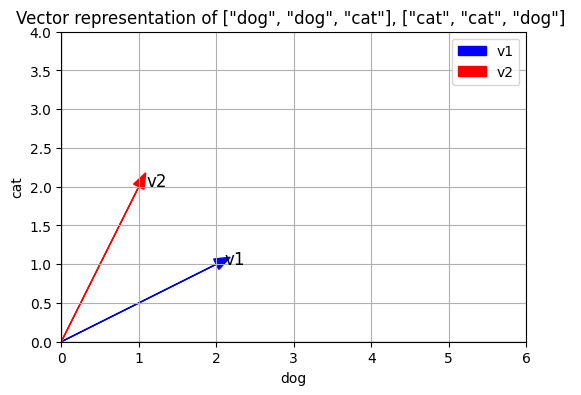

In [10]:
corpus = [["dog", "dog", "cat"], ["cat", "cat", "dog"]]

v1 = [corpus[0].count("dog"), corpus[0].count("cat")]
v2 = [corpus[1].count("dog"), corpus[1].count("cat")]

print(v1, v2)

import matplotlib.pyplot as plt


# Set up the plot
plt.figure(figsize=(6, 6))
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Plot arrows from origin
plt.arrow(0, 0, v1[0], v1[1], head_width=0.15, head_length=0.2, fc='blue', ec='blue', label='v1')
plt.arrow(0, 0, v2[0], v2[1], head_width=0.15, head_length=0.2, fc='red', ec='red', label='v2')

# Annotate vector tips
plt.text(v1[0] + 0.1, v1[1], 'v1', fontsize=12)
plt.text(v2[0] + 0.1, v2[1], 'v2', fontsize=12)

# Axis settings
plt.xlim(0, 6)
plt.ylim(0, 4)
plt.xlabel('dog')
plt.ylabel('cat')
plt.title('Vector representation of ["dog", "dog", "cat"], ["cat", "cat", "dog"] ')
plt.legend()
plt.gca().set_aspect('equal')  # Keep aspect ratio square
plt.show()



Having visualized the vectors, we can move on towards building an intuition for talking about distance between vectors, and vector comparison. 

# Dot-product

The forumla for finding the dot product is the following: 

$a \cdot b =\sum_{i=0}^{n - 1}(a_ib_i)$


In other words, for each feature in vector a and b, take the sum of the product of feature i in vector a with feature i in vector b from index 0 to the last index of the vectors. (Where we count index 0 as the first index of a vector.) The algorithm assumes that the vectors are of equal length. 

Example: 

a = [1, 2, 3]

b = [2, 2, 2]

dot product = ((1 * 2) + (2 * 2) + (3 * 2) ) = 12

Example 2: 

a = [1, 1, 7]

b = [2, 3, 6]

dot product = ((1 * 2) + (1 * 3) + (7 * 6) ) = 47


Example 3: 

a = [0]

b = [1]

dot product = 0 * 1 = 0


Here is an implementation in Python, meant to be readable. 


In [11]:
def dot_product(vector1: list[float], vector2 : list[float]) -> float :
    """
    A method for finding the dot product of two vectors.
    
    Args: 
        vector1 (list[float]): a list representing a vector.
        vector2 (list[float]): a list representing a different vector. 
        
    Returns: 
        sum (float): the sum of the calculation.
        
    Raises: 
        ValueError: If the vectors are not of the same length. 
    """
    
    if len(vector1) != len(vector2):
        raise ValueError("Vectors must be of the same length")
        
    
    total = 0 
    for v1, v2 in zip(vector1, vector2): 
        total += (v1 * v2)
    return total

print(f"Dot product, [1, 2, 3], [2, 2, 2] = {dot_product([1, 2, 3], [2, 2, 2])}" )
print(f"Dot product, [1, 1, 7], [2, 3, 6] = {dot_product([1, 1, 7], [2, 3, 6])}" )
print(f"Dot product, [0], [1] = {dot_product([0], [1])}" )






Dot product, [1, 2, 3], [2, 2, 2] = 12
Dot product, [1, 1, 7], [2, 3, 6] = 47
Dot product, [0], [1] = 0


# Euclidean distance

The Euclidean distance between two vectors **a** and **b** is calculated as:

$$
d(a, b) = \sqrt{\sum_{i=1}^{n}(a_i - b_i)^2}
$$

Let's do a few examples: 

let v1 be [1] and v2 be [2] 

Then the Euclidean distance between v1 and v2 would be: 

$ \sqrt{1 - 2}² = \sqrt{(-1)²} = \sqrt{1} = 1 $ 


Let's do another, v1 = [1.2, 3.0] and v2 = [4.5, 0.2] 

$ \sqrt((1.2 - 4.5)² + (3.0 - 0.2)²) = \sqrt((-3.3)² + (2.8)²) = $ 
$ \sqrt(10.89 + 7.84) = \sqrt(18.74) = 4.3278 $ 

Let's do a weird one: v1 = [0] v2 = [0] 

$ \sqrt((0 - 0)²) = \sqrt(0) = 0 $ 

Notice that the formula demands that the vectors are of the same length. 



We can calculate this in a very straightforward way in Python like this: 


In [12]:
import math 

def euclidean_distance(
        vector1: list[float], vector2 : list[float]
        ) -> float :
    """ 
    Method for calculating the euvlidean distance between two vectors.

    Args: 
        vector1 (list[float]) : a vector.
        vector2 (list[float]): another vector

    Returns: 
        the result (float) of the calculation. 
    """

    if len(vector1) != len(vector2):
        raise ValueError("Vectors must be of the same length")
            
        
    total = 0 
    for v1, v2 in zip(vector1, vector2): 
        total += (v1 - v2)**2
    return math.sqrt(total)

# Or with a generator comprehension


def euclidean_distance_comp(vector1, vector2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(vector1, vector2)))

print(euclidean_distance([1], [2]))
print(euclidean_distance_comp([1.2, 3.0], [4.5, 0.2]))
print(euclidean_distance([0], [0]))

1.0
4.32781700167648
0.0


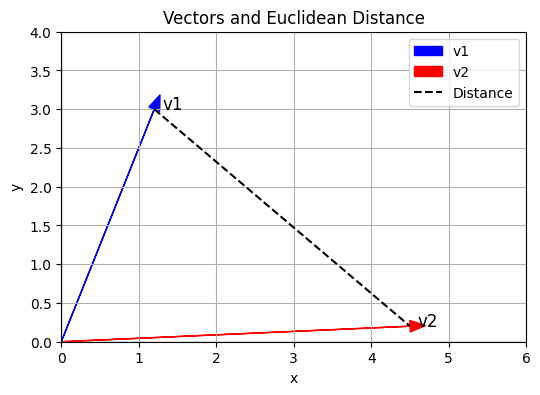

In [13]:
# And we can visualize the Euclidean distance between ,[1.2, 3.0] and [4.5, 0.2] like this:

import matplotlib.pyplot as plt

# Define vectors
v1 = [1.2, 3.0]
v2 = [4.5, 0.2]

# Set up the plot
plt.figure(figsize=(6, 6))
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Plot arrows from origin
plt.arrow(0, 0, v1[0], v1[1], head_width=0.15, head_length=0.2, fc='blue', ec='blue', label='v1')
plt.arrow(0, 0, v2[0], v2[1], head_width=0.15, head_length=0.2, fc='red', ec='red', label='v2')

# Plot the dashed distance line between vector tips
plt.plot([v1[0], v2[0]], [v1[1], v2[1]], color='black', linestyle='dashed', label='Distance')

# Annotate vector tips
plt.text(v1[0] + 0.1, v1[1], 'v1', fontsize=12)
plt.text(v2[0] + 0.1, v2[1], 'v2', fontsize=12)

# Axis settings
plt.xlim(0, 6)
plt.ylim(0, 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vectors and Euclidean Distance')
plt.legend()
plt.gca().set_aspect('equal')  # Keep aspect ratio square
plt.show()



# Length normalization

$$\frac{x}{||x||}$$ for each element x in vector v, or 

$$
\frac{x}{\|x\|} = \left[\frac{x_1}{\|x\|}, \frac{x_2}{\|x\|}, \dots, \frac{x_n}{\|x\|} \right]
$$

**Length of a vector**
$$||x|| = \sqrt{x \cdot x} = \sqrt{\sum_{i=1}^nx_i^2}$$

So, there are two formulas to understand here, one for finding the length of a vector, and one for length normalizing a vector.

We find the length of a vector by taking the square root of the sum of the squared elements of the vector. 

So for the vector [0, 1, 2] the length would be: 

$ \sqrt((0)² + (1)² + (2)²) = \sqrt(0 + 1 + 4) = \sqrt(5) = 2.236067977  $ 

Or for the vector [2, 2] the length would be: 

$ \sqrt((2)² + (2)²) = \sqrt(4 + 4) = \sqrt(8) = 2.828427125 $ 

After that, we length normalize the vector by dividing each of the elements in the vector by the length of the vector. 
So returning to the two examples, the length normalized vector [0, 1, 2]

would be [(0 / 2.236067977), (1 / 2.236067977), (2 / 2.236067977)] which is [0, 0.447213596, 0.894427191] 

The length normalized vector of vector [2, 2] is [(2 / 2.828427125), (2 / 2.828427125) ] which is [0.707106781, 0.707106781] 




In [14]:
import math

def length_normalization(vector: list[float]) -> list[float] :
    """
    A method for normalizing a vector.
    
    Args: 
        vector1 (list[float]): a list representing a vector.
         
        
    Returns: 
        normalized_vector (list[float]): the sum of the calculation.
        
    Raises: 
        ValueError: If it is a zero-length vector. 
    """
    
 
    
    total = 0
    for element in vector: 
        total += element ** 2
    length = math.sqrt(total)
    
    if length == 0: 
        raise ValueError("cannot normalize a zero-length vector")
    normalized_vector = [x/ length for x in vector]

    return normalized_vector

doc1star, doc2star = length_normalization([2,1]), length_normalization([10, 5])
print(doc1star, doc2star) 

[0.8944271909999159, 0.4472135954999579] [0.8944271909999159, 0.4472135954999579]


We length normalize vectors partly to make them easier to compute, but also to focus on the direction of a vector rather than 
on its magnitude. This can be particularly useful when we work with a corpus of varying length of the corpus. 

Let's imagine the really weird corpus consisting of doc1 = [dog, dog, cat] and doc 2 [dog * 10, cat * 5] 

We can then draw up a vector space representation of this corpus as follows: 

We have two words in the vocabulary, therefore we can represent the vectors on a coordinate system with two axes, x for dog and y for cat. doc 1 would then be [2, 1] and doc 2 would be [10, 5]

When we length normalize them we get doc 1* = [0.8944271909999159, 0.4472135954999579]  and doc 2* = [0.8944271909999159, 0.4472135954999579]. 

We can see that they are the same. This becomes even clearer with a visualization: 


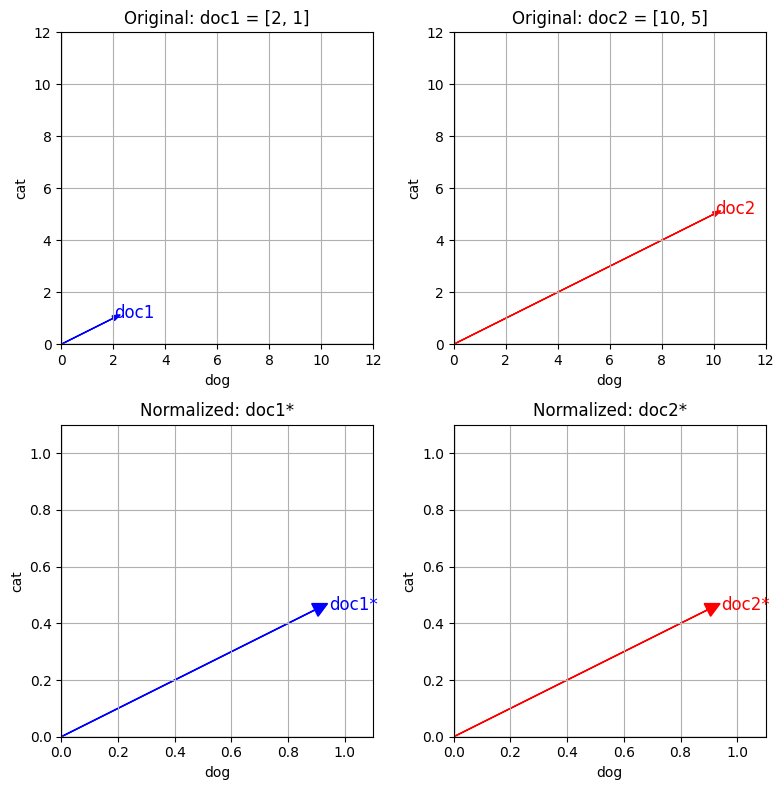

In [15]:
import matplotlib.pyplot as plt

# Original vectors
doc1 = [2, 1]
doc2 = [10, 5]

# Normalized vectors
doc1s = length_normalization(doc1)
doc2s = length_normalization(doc2)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

def plot_vector(ax, vector, label, color, title):
    ax.grid(True)
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)
    ax.arrow(0, 0, vector[0], vector[1],
             head_width=0.05 if max(vector) < 1 else 0.2,
             head_length=0.05 if max(vector) < 1 else 0.3,
             fc=color, ec=color)
    ax.text(vector[0] + 0.05, vector[1], label, fontsize=12, color=color)
    ax.set_xlim(0, 1.1 if max(vector) < 1 else 12)
    ax.set_ylim(0, 1.1 if max(vector) < 1 else 12)
    ax.set_aspect('equal')
    ax.set_xlabel('dog')
    ax.set_ylabel('cat')
    ax.set_title(title)

plot_vector(axs[0, 0], doc1, 'doc1', 'blue', 'Original: doc1 = [2, 1]')
plot_vector(axs[0, 1], doc2, 'doc2', 'red', 'Original: doc2 = [10, 5]')
plot_vector(axs[1, 0], doc1s, 'doc1*', 'blue', 'Normalized: doc1*')
plot_vector(axs[1, 1], doc2s, 'doc2*', 'red', 'Normalized: doc2*')

plt.tight_layout()
plt.show()


The plots makes it clear that they are both pointing in the same direction, and in fact, they are the same vectors when they are normalized. This will be important when we turn to cosine similarity. For comparison, here is a visualization of two disimilar vectors: 

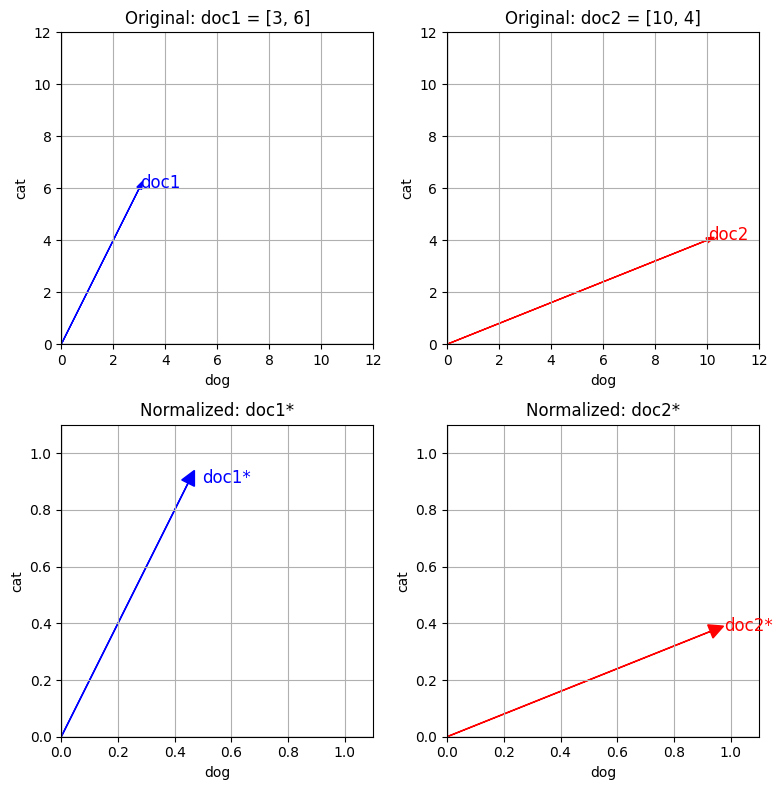

In [16]:
import matplotlib.pyplot as plt

# Original vectors
doc1 = [3, 6]
doc2 = [10, 4]

# Normalized vectors
doc1s = length_normalization(doc1)
doc2s = length_normalization(doc2)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

def plot_vector(ax, vector, label, color, title):
    ax.grid(True)
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)
    ax.arrow(0, 0, vector[0], vector[1],
             head_width=0.05 if max(vector) < 1 else 0.2,
             head_length=0.05 if max(vector) < 1 else 0.3,
             fc=color, ec=color)
    ax.text(vector[0] + 0.05, vector[1], label, fontsize=12, color=color)
    ax.set_xlim(0, 1.1 if max(vector) < 1 else 12)
    ax.set_ylim(0, 1.1 if max(vector) < 1 else 12)
    ax.set_aspect('equal')
    ax.set_xlabel('dog')
    ax.set_ylabel('cat')
    ax.set_title(title)

plot_vector(axs[0, 0], doc1, 'doc1', 'blue', 'Original: doc1 = [3, 6]')
plot_vector(axs[0, 1], doc2, 'doc2', 'red', 'Original: doc2 = [10, 4]')

plot_vector(axs[1, 0], doc1s, 'doc1*', 'blue', 'Normalized: doc1*')
plot_vector(axs[1, 1], doc2s, 'doc2*', 'red', 'Normalized: doc2*')

plt.tight_layout()
plt.show()


# A metanote on similarity - how similarity depends on the context. 

I think this is a good place to pause and take a more meta-level view of what we're doing.

We'll use these algorithms to try to say something about how similar one document is to another — but what do we really mean by "similarity"?

First of all, context matters. What we're doing with these algorithms is trying to calculate how similar doc 1 is to doc 2, based on a model trained on a specific corpus — and the corpus matters for determining the similarity.

Suppose we compare two docs, 1 and 2, using cosine similarity and a pretrained model based on TF-IDF. The result might vary quite a bit depending on what corpus the model was trained on. What happens when doc 1 contains several words that aren't in the vocabulary? Usually, we just discard them.

Secondly, another point to consider is that these algorithms — unlike some others that we’ll cover in a later notebook — don’t look at semantic similarity, but focus more on pure word counts.

So, "the malodorous feline" and "the smelly cat" would probably not be considered similar using these approaches, but might be considered similar if we use something like Word2Vec.

More on that in a future notebook. 

(I got the phrase maloderous feline from a question card in Trivial Pursuit). 

# Cosine Similarity

Cosine similarity measures the similarity between two vectors by comparing the **angle** between them rather than their **Euclidean distance**. This is useful when vectors differ in magnitude but share direction.

The formula for cosine similarity is:

$$
\text{cosine\_similarity}(\mathbf{A}, \mathbf{B}) = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \cdot \sqrt{\sum_{i=1}^{n} B_i^2}} = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|}
$$

This is equivalent to computing the dot product between **normalized** vectors:

$$
\text{cosine\_similarity}(\mathbf{v}_1, \mathbf{v}_2) = \mathbf{v}_1^* \cdot \mathbf{v}_2^*
$$

---

## Example

Let:

$$
\mathbf{v}_1 = [1, 3], \quad \mathbf{v}_2 = [2, 6]
$$

These vectors point in the same direction (i.e. \( \mathbf{v}_2 = 2 \cdot \mathbf{v}_1 \)), so their cosine similarity should be 1.

---

### Step 1: Normalize $ \mathbf{v}_1 $

Compute the L2 norm:

$$
\|\mathbf{v}_1\| = \sqrt{1^2 + 3^2} = \sqrt{1 + 9} = \sqrt{10} \approx 3.16228
$$

Normalize:

$$
\mathbf{v}_1^* = \left[ \frac{1}{3.16228}, \frac{3}{3.16228} \right] \approx [0.31623, 0.94868]
$$

---

### Step 2: Normalize $ \mathbf{v}_2 $

Compute the L2 norm:

$$
\|\mathbf{v}_2\| = \sqrt{2^2 + 6^2} = \sqrt{4 + 36} = \sqrt{40} \approx 6.32456
$$

Normalize:

$$
\mathbf{v}_2^* = \left[ \frac{2}{6.32456}, \frac{6}{6.32456} \right] \approx [0.31623, 0.94868]
$$

---

### Step 3: Compute Cosine Similarity

Use the dot product of the normalized vectors:

$$
\text{cosine\_similarity} = (0.31623 \times 0.31623) + (0.94868 \times 0.94868)
$$

$$
\approx 0.10000 + 0.90000 = 1.00000
$$

---

### Final Result

$$
\text{cosine\_similarity}([1, 3], [2, 6]) = 1.0
$$

As expected, the cosine similarity is **1**, since the vectors point in the exact same direction.


## Example 2

Let:

$$
\mathbf{v}_1 = [-7, 9, 2], \quad \mathbf{v}_2 = [0, 0, 3]
$$

These vectors do not point in the same direction. \( \mathbf{v}_2 \) is aligned with the z-axis, while \( \mathbf{v}_1 \) has components in all three axes, so we expect a low cosine similarity.

---

### Step 1: Normalize $ \mathbf{v}_1 $

Compute the L2 norm:

$$
\|\mathbf{v}_1\| = \sqrt{(-7)^2 + 9^2 + 2^2} = \sqrt{49 + 81 + 4} = \sqrt{134} \approx 11.57584
$$

Normalize:

$$
\mathbf{v}_1^* = \left[ \frac{-7}{11.57584}, \frac{9}{11.57584}, \frac{2}{11.57584} \right] \approx [-0.60470,\ 0.77748,\ 0.17277]
$$

---

### Step 2: Normalize $ \mathbf{v}_2 $

Compute the L2 norm:

$$
\|\mathbf{v}_2\| = \sqrt{0^2 + 0^2 + 3^2} = \sqrt{9} = 3.00000
$$

Normalize:

$$
\mathbf{v}_2^* = \left[ \frac{0}{3}, \frac{0}{3}, \frac{3}{3} \right] = [0.00000,\ 0.00000,\ 1.00000]
$$

---

### Step 3: Compute Cosine Similarity

Use the dot product of the normalized vectors:

$$
\text{cosine\_similarity} = (-0.60470 \times 0.00000) + (0.77748 \times 0.00000) + (0.17277 \times 1.00000)
$$

$$
= 0.00000 + 0.00000 + 0.17277 = 0.17277
$$

---

### Final Result

$$
\text{cosine\_similarity}([-7, 9, 2], [0, 0, 3]) \approx 0.17277
$$

## Example 3

Let:

$$
\mathbf{v}_1 = [-2.2, -1.1], \quad \mathbf{v}_2 = [2.2, 1.1]
$$


These vectors should be complete oposites, so we expect that the result should be -1

---

### Step 1: Normalize $ \mathbf{v}_1 $

Compute the L2 norm:

$$
\|\mathbf{v}_1\| = \sqrt{(-2.2)^2 + (-1.1)^2 } = \sqrt{4.84 + 1.21} = \sqrt{6-05} \approx 2.45967
$$

Normalize:

$$
\mathbf{v}_1^* = \left[ \frac{-2.2}{2.45967}, \frac{-1.1}{2.45967}, \right] \approx [-0.89443,\ -0.44721]
$$

---

### Step 2: Normalize $ \mathbf{v}_2 $

Compute the L2 norm:

$$
\|\mathbf{v}_1\| = \sqrt{2.2^2 + 1.1^2 } = \sqrt{4.84 + 1.21} = \sqrt{6.05} \approx 2.45967
$$

Normalize:

$$
\mathbf{v}_2^* = \left[ \frac{2.2}{2.45967}, \frac{1.1}{2.45967}, \right] \approx [0.89443,\ 0.44721]
$$

---

### Step 3: Compute Cosine Similarity

Use the dot product of the normalized vectors:

$$
\text{cosine\_similarity} = (-0.89443 \times 0.89443) + (-0.44721 \times 0.44721)
$

$$
= −0.80000 + -0.200000 = -1.00000
$$

---

### Final Result

$$
\text{cosine\_similarity}([-2.2, -1.1], [2.2, 1.1]) \approx -1
$$




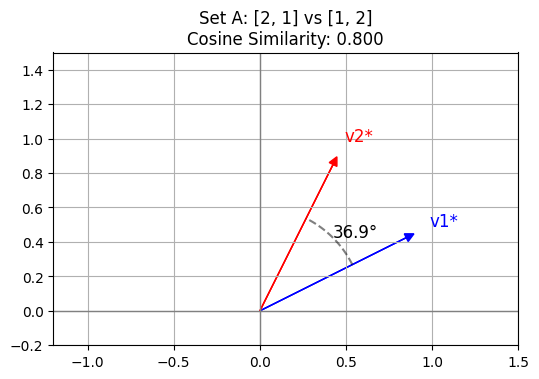

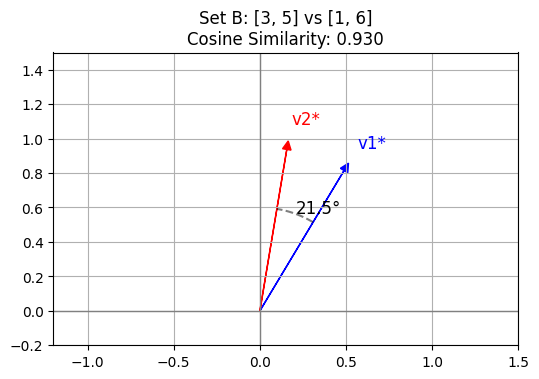

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Normalization function
def normalize(v):
    norm = np.linalg.norm(v)
    return v / norm if norm != 0 else v

# Plotting function
def plot_normalized_vectors(v1, v2, title):
    # Normalize vectors
    v1_norm = normalize(v1)
    v2_norm = normalize(v2)

    # Compute cosine similarity and angle
    cos_sim = np.dot(v1_norm, v2_norm)
    angle_rad = np.arccos(np.clip(cos_sim, -1.0, 1.0))
    angle_deg = np.degrees(angle_rad)

    # Set up plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.grid(True)
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)

    # Draw vectors
    ax.arrow(0, 0, v1_norm[0], v1_norm[1], head_width=0.05, head_length=0.05,
             fc='blue', ec='blue', length_includes_head=True)
    ax.arrow(0, 0, v2_norm[0], v2_norm[1], head_width=0.05, head_length=0.05,
             fc='red', ec='red', length_includes_head=True)

    # Labels
    ax.text(v1_norm[0]*1.1, v1_norm[1]*1.1, 'v1*', color='blue', fontsize=12)
    ax.text(v2_norm[0]*1.1, v2_norm[1]*1.1, 'v2*', color='red', fontsize=12)

    # Draw angle arc
     # --- Draw arc between v1 and v2, starting at v1's direction
    angle_start = np.arctan2(v1_norm[1], v1_norm[0])
    angle_end = np.arctan2(v2_norm[1], v2_norm[0])

    # Ensure correct arc direction (positive rotation)
    if angle_end < angle_start:
        angle_end += 2 * np.pi

    arc_angles = np.linspace(angle_start, angle_end, 100)
    radius = 0.6
    x_arc = radius * np.cos(arc_angles)
    y_arc = radius * np.sin(arc_angles)
    ax.plot(x_arc, y_arc, 'k--', alpha=0.5)

    # Midpoint for label
    mid_angle = (angle_start + angle_end) / 2
    ax.text(radius * np.cos(mid_angle), radius * np.sin(mid_angle),
            f"{angle_deg:.1f}°", fontsize=12, color='black')

    ax.set_xlim(-1.2, 1.5)
    ax.set_ylim(-0.2, 1.5)
    ax.set_aspect('equal')
    ax.set_title(f'{title}\nCosine Similarity: {cos_sim:.3f}')
    plt.show()

# --- Plot for Set A: [2, 1] and [1, 2]
plot_normalized_vectors(np.array([2, 1]), np.array([1, 2]), 'Set A: [2, 1] vs [1, 2]')

# --- Plot for Set B: [3, 5] and [1, 6]
plot_normalized_vectors(np.array([3, 5]), np.array([1, 6]), 'Set B: [3, 5] vs [1, 6]')


In [18]:
def cosine_similarity(vector1: list[float], vector2 : list[float]) -> float :
    """
    A method for finding the cosine similarity of two vectors.
    
    Args: 
        vector1 (list[float]): a list representing a vector.
        vector2 (list[float]): a list representing a different vector. 
        
    Returns: 
        dotproduct (float): the dot product of the normalized vectors.
        
    Raises: 
        ValueError: If the vectors are not of the same length. 
    """
    
    if len(vector1) != len(vector2):
        raise ValueError("Vectors must be of the same length")
    if all(v == 0 for v in vector1) or all(v == 0 for v in vector2): 
        return 0.0
        
    
    vector1_normalized = length_normalization(vector1)
    vector2_normalized = length_normalization(vector2)
    result = dot_product(vector1_normalized, vector2_normalized)
    
    return round(result, ndigits= 7) 

print(cosine_similarity([1, 3], [2, 6]))
print(cosine_similarity([-2.2, -1.1], [2.2, 1.1]))



1.0
-1.0


# TF-IDF 

What is tf-idf, when to use it, difference between tf-idf and bag of words. 

### 1. Term Frequency (TF)
The term frequency of a term *t* in a document *d* is the count of *t* in *d*:

$$
\text{tf}(t, d) = \text{count of } t \text{ in } d
$$

> Note: TF is often normalized by dividing by the total number of terms in the document. We omit that here for simplicity.
    > It is also common to remove stop words, i.e words like "and", "but", "if" and so on that we assume shouldn't matter for most nlp-tasks. 

---

### 2. Document Frequency (DF)
The document frequency of a term *t* is the number of documents in the corpus that contain *t*:

$$
\text{df}(t) = \# \text{ of documents containing } t
$$

> Important: This is not the total count of *t* in the corpus — it’s the number of **documents** that contain *t* at least once.

---

### 3. Inverse Document Frequency (IDF)
The inverse document frequency of a term *t*, in a corpus of *N* documents, is:

$$
\text{idf}(t) = \log\left(\frac{N}{1 + \text{df}(t)}\right)
$$

> We add 1 to the denominator to avoid division by zero.  
> We use the **natural logarithm** (base *e*):  
> [See Wikipedia: Natural logarithm](https://en.wikipedia.org/wiki/Natural_logarithm)

---

### 4. TF-IDF
The final TF-IDF score of a term *t* in document *d* is the product of its TF and IDF:

$$
\text{tf-idf}(t, d) = \text{tf}(t, d) \times \text{idf}(t)
$$

We can solve this in three logical steps: 

1. Find the df for every unique term in the corpus, this is probably the most natural place to start.
2. Find the idf value for every unique term in the corpus.
3. Then, for every document *d* and for every term *t* in *d*, compute the tf of t in d, by multiplying the tf of t in d with the idf of t. That is iterate over every document in the corpus, iterate over every t in d, and compute the tf-idf.


Let's do a few examples, first one where we just calculate the tf-idfs of a corpus, and then one example where we also calculate the euclidean distance. 


Let the corpus be  [["The cat sat on the mat"], 
        ["The duck is not happy"], 
        ["The cat and dog are friends"]]


We'll begin by calculating the dfs. 

We assume that "The" = "the", and we ignore punctuations, but we do not remove stop words in this example. 

So let's begin by finding the unique set of words: 

['and', 'are', 'cat', 'dog', 'duck', 'friends', 'happy', 'is', 'mat', 'not', 'on', 'sat', 'the']

We then count the df for each of these terms. 

and: 1 
are: 1 
cat: 2
dog: 1
duck: 1
friends: 1
happy: 1
is: 1
mat: 1
not: 1
on: 1 
sat: 1
the: 3 


we can then move on to the idfs the whole corpus. This can also be done as soon as we have the whole corpus, and we have counted the dfs.
We also need a mapping from term to index. an easy way to do this is to take the unique terms in the corpus, and map those terms to a counter, so we end up with something like 


mapping_dict = {
'and' : 0,
'are': 1,
'cat' : 2,
'dog' : 3,
'duck' : 4,
'friends': 5,
'happy' : 6,
'is' : 7,
'mat' : 8,
'not' : 9,
'on' : 10,
'sat' : 11,
'the' : 12}


Looking at the df count, we see that there are really just three cases that we need to calculate, since all the df counts are either 1, 2 or 3. 


idf("sat") = log(N / (1 + df("sat")) = log(3 / 2) = log(1.5) = 0.40546   # if df(term) = 1, idf(term) = 0.40546
idf("cat") = log(N / (1 + df("cat))) = log(3 / 3) = log(1) = 0           # if df(term) = 2, idf(term) = 0 
idf("the") = log(N / (1 + df("the")) = log(3 / 4) = log(0.75) = -0.28768 # if df(term) = 3, idf(term) = -0.28768


Therefore, we can just fill out the idf vector for the corpus. 

[0.40546, 0.40546, 0, 0.40546, 0.40546, 0.40546, 0.40546, 0.40546, 0.40546, 0.40546, 0.40546, 0.40546, -0.28768] 



We can then calculate the tf-idf by looping over every document, and every term in the document like this: 


doc 1 ["the cat sat on the mat"] 

we can simplify the doc to a tokenized set, and sorted for simplicity: {"cat", "mat", "on", "sat", "the"}


tf_idf("cat", doc1) = tf("cat", doc1) * idf("cat") = 1 * 0 = 0 
tf_idf("mat", doc1) = tf("mat", doc1) * idf("mat") = 1 * 0.40546 = 0.40546
tf_idf("on", doc1) = tf("on", doc1) * idf("on") = 1 * 0.40546 = 0.40546
tf_idf("sat", doc1) = tf("sat", doc1) * idf("sat") = 1 * 0.40546 = 0.40546
tf_idf("the", doc1) = tf("the", doc1) * idf("the") = 2 * -0.28768 = -0.57536

Even though "the" appears twice in the doc, it's sufficient to calculate the tf-idf once. 

doc 2 ["the duck is not happy"], sorted to ["duck", "happy", "is", "not", "the"] 


tf_idf("duck", doc1) = tf("duck", doc1) * idf("duck") = 1 * 0.40546 = 0.40546
tf_idf("is", doc1) = tf("is", doc1) * idf("is") = 1 * 0.40546 = 0.40546
tf_idf("not", doc1) = tf("not", doc1) * idf("not") = 1 * 0.40546 = 0.40546
tf_idf("happy", doc1) = tf("happy", doc1) * idf("happy") = 1 * 0.40546 = 0.40546
tf_idf("the", doc1) = tf("the", doc1) * idf("the") = 1 * -0.28768 = -0.28768


doc 3 ["The cat and dog are friends"] sorted to ["and", "are", "cat", "dog", "friends", "the"] 

tf_idf("and", doc1) = tf("and", doc1) * idf("and") = 1 *  0.40546 = 0.40546
tf_idf("are", doc1) = tf("are", doc1) * idf("are") = 1 *  0.40546 = 0.40546
tf_idf("cat", doc1) = tf("cat", doc1) * idf("cat") = 1 * 0 = 0
tf_idf("dog", doc1) = tf("dog", doc1) * idf("dog") = 1 * 0.40546 = 0.40546
tf_idf("friends", doc1) = tf("friends", doc1) * idf("friends") = 1 * 0.40546 = 0.40546
tf_idf("the", doc1) = tf("the", doc1) * idf("the") = 1 * -0.28768 = -0.28768









### Footnote: 

As became clear in these examples, it is possible to optimize the algoirthm by mapping the unique values of 
the df dict to an idf, and then rather than calculating the idf for every term in corpus, rather calculate the idf for every unique value in the df dict, and then create a dict from df value to idf value. 
















In [7]:
import math

import spacy



nlp = spacy.load("en_core_web_sm")


def tokenize(document: str) -> list[str]:
    """Tokenize a doc using spacy"""
    doc = nlp(document)
    processed = [
        token.text.lower() for token in doc if token.is_alpha
    ]
    return processed


corpus = [["The cat sat on the mat"], 
        ["The duck is not happy"], 
        ["The cat and dog are friends"]]

unique_words = {
    word
    for sublist in corpus
    for sentence in sublist
    for word in tokenize(sentence)
}

print(sorted(unique_words))



['and', 'are', 'cat', 'dog', 'duck', 'friends', 'happy', 'is', 'mat', 'not', 'on', 'sat', 'the']


In [20]:
import math
import numpy as np
import spacy



nlp = spacy.load("en_core_web_sm")


def tokenize(document: str) -> list[str]:
    """Tokenize a doc using spacy, leave stop words"""
    doc = nlp(document)
    processed = [
        token.text.lower() for token in doc if token.is_alpha]
    return processed

def document_frequency(all_words : set[str], corpus: list[list[str]]) -> dict[str, int]:
    df_dict = {}
    # tokenize docs
    tokenized_all_docs = [] 
    for doc in corpus: 
        #extract doc as str
        doc = doc[0]
        tokens = [word for word in tokenize(doc)]
        tokenized_all_docs.append(tokens)
        
    # count df 

    for term in all_words:
        counter = 0
        for doc in tokenized_all_docs: 
            if term in doc: 
                counter += 1
        df_dict[term] = counter  
                    
    return df_dict

def term_frequency(term: str, doc: list[str]) -> int:
    return doc.count(term)

def create_tf_idf_context(corpus: list[list[str]]) -> tuple[dict[str, int], list[float]]:
    all_words = {word 
                 for doc in corpus 
                 for sentence in doc
                for word in tokenize(sentence)
                }
    df_dict = document_frequency(all_words, corpus)
    term_index_mapping = {term: idx for idx, term in enumerate(sorted(all_words))}  # ✅ Sort terms
    idf_vector = np.zeros(len(all_words))
    N = len(corpus)
    for term, idx in term_index_mapping.items():
        idf_vector[idx] = math.log(N / (1 + df_dict.get(term, 0)))
    return term_index_mapping, idf_vector

def tf_idf_2(term_index_mapping: dict[str, int], document: list[str], idf_vector: np.ndarray) -> np.ndarray:
    
    # first we create the empty vector which will be the tf-idf vector of a document.
    tfidf_vector = np.zeros(len(idf_vector))
    # iterate over the terms in the token
    for word in document:
        # make sure that we map the term to the right index of the idf_vector
        if word in term_index_mapping:
            idx = term_index_mapping[word]
            tf = term_frequency(word, document)
            # calculate the tf_idf score, update vector
            tfidf_vector[idx] = tf * idf_vector[idx]
    return tfidf_vector

# ----------- Example Usage -----------


corpus = [["The cat sat on the mat"], 
        ["The duck is not happy"], 
        ["The cat and dog are friends"]]


term_index_mapping, idf_vector = create_tf_idf_context(corpus)

# print all idfs 
for term, index in term_index_mapping.items(): 
    print(term, idf_vector[index]) 


def print_all_tf_idf_values(term_index_mapping: dict[str, int], corpus : list[list[str]], idf_vector : np.ndarray) -> None: 
    counter = 0
    for doc in corpus:
        doc = doc[0] # to get the doc as a str
        tokens = tokenize(doc)
        tf_idf_vector = tf_idf_2(term_index_mapping, tokens, idf_vector)
        for token in tokens:
            print(f"doc number: {counter} term : {token} tf_idf {tf_idf_vector[term_index_mapping[token]]}")
        counter += 1
            
            

print_all_tf_idf_values(term_index_mapping, corpus, idf_vector)

and 0.4054651081081644
are 0.4054651081081644
cat 0.0
dog 0.4054651081081644
duck 0.4054651081081644
friends 0.4054651081081644
happy 0.4054651081081644
is 0.4054651081081644
mat 0.4054651081081644
not 0.4054651081081644
on 0.4054651081081644
sat 0.4054651081081644
the -0.2876820724517809
doc number: 0 term : the tf_idf -0.5753641449035618
doc number: 0 term : cat tf_idf 0.0
doc number: 0 term : sat tf_idf 0.4054651081081644
doc number: 0 term : on tf_idf 0.4054651081081644
doc number: 0 term : the tf_idf -0.5753641449035618
doc number: 0 term : mat tf_idf 0.4054651081081644
doc number: 1 term : the tf_idf -0.2876820724517809
doc number: 1 term : duck tf_idf 0.4054651081081644
doc number: 1 term : is tf_idf 0.4054651081081644
doc number: 1 term : not tf_idf 0.4054651081081644
doc number: 1 term : happy tf_idf 0.4054651081081644
doc number: 2 term : the tf_idf -0.2876820724517809
doc number: 2 term : cat tf_idf 0.0
doc number: 2 term : and tf_idf 0.4054651081081644
doc number: 2 term : 

# Mini project

A script that finds the most similar document in a corpus to an input document. 
I use my own custom implementation of the algorithms used in this notebook. 
This probably makes the script slower and less precise, but then again, it's easier 
to follow. 

After some tests, it seems like the current version of v1 takes about 93 min to run, while the scikit learn version uses about 93 ms. 
That's a bit of a difference. 

In [23]:
from pathlib import Path 

BASE_DIR = Path.cwd().parent
DATA_DIR = BASE_DIR / "data"



In [21]:
import spacy
import time as t

before_nlp_load = t.time()

# Load the SpaCy English tokenizer

nlp = spacy.load("en_core_web_sm")

after_nlp_load = t.time()

difference = after_nlp_load - before_nlp_load

print(f"NLP load: Difference is {difference}s")

def tokenize(document: str) -> list[str]:
    """Tokenize a doc using spacy"""
    before_nlp_use = t.time()
    doc = nlp(document)
    after_nlp_use = t.time()
    nlp_use_difference = after_nlp_use - before_nlp_use
    print(f"NLP use: Difference is {nlp_use_difference}s")
    before_processed = t.time()
    processed = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
    after_processed = t.time()
    processed_difference = after_processed - before_processed
    print(f"Processed: Difference is {processed_difference}")
    return processed





NLP load: Difference is 0.5284488201141357s


In [24]:
import math
import numpy as np
from pathlib import Path
import sys
from dataclasses import dataclass
from collections import Counter



sys.argv = ["name", DATA_DIR / "test-docs2" , DATA_DIR / "input_docs/input-lik.txt"]

@dataclass(frozen=True)
class Document:
    """An immutable (kind of) wrapper class for the documents"""

    content: str
    vector: np.ndarray



def create_tf_idf_context(corpus: list[str]) -> tuple[set[str], dict[str, int], np.ndarray]:
    """
    Creates the context needed for calculating TF-IDFs. 
    
    
    Tests run, tests/create_document_frequency_dict
    
    Args: 
        corpus (list[str]): all the corpus that the model will be built on.
    
    Returns: 
        all_words (set[str]): the set of all words in corpus.
        term_index_dict (dict[str, int]): a dict that maps term to an index that should be the same in the idf-np.ndarray.
        idf_vector (np.ndarray): the idf vectors. 
    
    """
    
    # Get the set of all words in corpus
    all_words = {word for doc in corpus for word in tokenize(doc)}

    # Map the words to an index
    term_index_dict = {term: index for index, term in enumerate(sorted(all_words))}

    # Create the df
    df = create_document_frequency_dict(all_words, corpus)

    N = len(corpus)  # We need N for the inverse document frequency.

    # Here we begin calculating the inverse document frequency for all the words and store them in a np arr.
    idf_vector = np.zeros(len(all_words))

    for term, idx in term_index_dict.items():
        idf_vector[idx] = math.log(N /(1 +  df[term]))

    # Return what We've made as a tuple
    return (all_words, term_index_dict, idf_vector)




def create_object_new(doc: str, all_words: set[str], term_index_dict: dict[str, int], idf_vector: np.ndarray) -> Document:
    """
    Create Document objects from the tf-idf context.
    
    Args: 
        doc (str): a text document as a str.
        all_words (set[str]): all the words of the corpus.
        term_index_dict (dict[str, int]): a dict mapping term to an index that is shared with the np.ndarray
        idf_vector (np.ndarray): a numpy array representing the idf-vector for the corpus.
    
    Returns: 
        Document : the Document object that has been generated.
    """
    
    vector = np.zeros(len(all_words))
    tokenized = tokenize(doc)
    tf_counter = Counter(tokenized)
    for word, tf in tf_counter.items():
        term_index = term_index_dict.get(word)
        if term_index is not None:
            vector[term_index] = tf * idf_vector[term_index]
    return Document(content=doc, vector=vector)



def create_document_frequency_dict(all_words: set[str], corpus: list[str]) -> dict[str, int]:
    """
    Readable method for finding the document frequencies of a corpus.
    
    Tests run, tests/test_create_document_frequency_dict

    Args:
        all_words (set): the set of all words in the corpus.
        corpus (list[str]): the whole corpus.

    Returns:
        a dict of the document frequencies.
    """

    df = {}
    
    tokenized_corpus = []
    
    for doc in corpus: 
        tokenized_corpus.append(tokenize(doc))

    for word in all_words:
        count = 0
        for d in tokenized_corpus:
            if word in d:
                count += 1
        df[word] = count
    return df


def most_similar(input_document: str, corpus: list[str]) -> tuple[str, float, Document, Document, dict[str, int]]:
    """
    Does the comparison, create Document objects based on the corpus. 
    
    Args: 
        input_document (str): the document that will be compared against the corpus.
        corpust (list[str]): the corpus.
        
    Returns: 
        tuple[str, float, Document, Document, dict[str, str]]:
            str : text content of most similar doc
            float: similarity score of the most similar doc
            Document: the Document object created from the input document.
            Document: the Document object created from the most similar doc in corpus.
            
    """
    
    all_words, term_index_dict, idf_vector = create_tf_idf_context(corpus)

    corpus_document_objects = [
        create_object_new(doc, all_words, term_index_dict, idf_vector) for doc in corpus
    ]

    input_doc = create_object_new(input_document, all_words, term_index_dict, idf_vector)

    highest = ("", -2)
    most_similar_doc_obj = None

    for corp_doc in corpus_document_objects:
        similarity = cosine_similarity(corp_doc.vector, input_doc.vector)
        if similarity > highest[1]:
            highest = (corp_doc.content, similarity)
            most_similar_doc_obj = corp_doc

    return highest[0], highest[1], input_doc, most_similar_doc_obj, term_index_dict

    # eturn (all_words, term_index_dict, idf_vector)
    

def print_top_tfidf(doc, term_index_dict, top_n=10):
    """ Chatgpt wrote this whilst troubleshooting, not sure whether I should keep it"""
    
    index_term = {i: term for term, i in term_index_dict.items()}
    sorted_indices = np.argsort(doc.vector)[::-1]
    print("\nTop TF-IDF terms:")
    for i in sorted_indices[:top_n]:
        print(f"{index_term[i]:>15}: {doc.vector[i]:.4f}")

def validate_files(dir_path: str, input_path: str) -> None:
    """
    Validates the corpus directory and the input file.
    
    Tests run, tests/test_validate_files

    Args:
        dir_path (str): the path to the corpus directory as a str.
        input_path (str): the path to the input file.

    Raises:
        NotADirectoryError if the dir_path is not a directory.
        ValueError either if all the corpus files are empty or the input file is empty.
        FileNotFoundError if the input_path is not a path to a file.
    """

    dir_path_object = Path(dir_path)
    input_path_object = Path(input_path)

    if not dir_path_object.is_dir():
        raise NotADirectoryError(
            f"Directory {dir_path_object} does not exist or is not a directory"
        )

    files = []
    for file in dir_path_object.iterdir():
        files.append(check_for_empty_file(file))

    # should check if there is at least one non-empty file
    if not any(files):
        raise ValueError("All the files in the directory are empty")

    if not input_path_object.is_file():
        raise FileNotFoundError(
            f"Input file {input_path} is not a file or could not be found"
        )

    if not check_for_empty_file(input_path_object):
        raise ValueError("Cannot check an empty file")

    return True


def check_for_empty_file(file_path: Path) -> bool:
    """Returns True if the size of the file is > 0, False otherwise
    
    Args:
        file_path (Path): a path to a file.
        
    Returns: 
        bool. 
    """
    return file_path.stat().st_size > 0


def main():
    if len(sys.argv) != 3:
        print("Usage: python script.py <corpus_directory> <input_file>")
        sys.exit(1)

    dir_path, input_file_path = sys.argv[1], sys.argv[2]
    validate_files(dir_path, input_file_path)

    dir_path = Path(dir_path)
    corpus_list = [p.read_text("UTF-8") for p in dir_path.iterdir()]

    with open(input_file_path, "r", encoding="UTF-8") as input_file:
        input_doc_text = input_file.read()

    most_similar_doc_content, similarity, input_doc, most_similar_doc, term_index_dict = most_similar(input_doc_text, corpus_list)

    print(f"Most similar doc: {most_similar_doc_content}")
    print(f"Similarity score: {similarity:.4f}")

    print("=== Input document top TF-IDF terms ===")
    print_top_tfidf(input_doc, term_index_dict)

    print("=== Most similar document top TF-IDF terms ===")
    print_top_tfidf(most_similar_doc, term_index_dict)

if __name__ == "__main__":
    main()


NLP use: Difference is 2.0319504737854004s
Processed: Difference is 0.002404928207397461
NLP use: Difference is 0.5523674488067627s
Processed: Difference is 0.0011882781982421875
NLP use: Difference is 0.6381950378417969s
Processed: Difference is 0.0012218952178955078
NLP use: Difference is 0.9825975894927979s
Processed: Difference is 0.002502918243408203
NLP use: Difference is 0.46072959899902344s
Processed: Difference is 0.0015211105346679688
NLP use: Difference is 0.6237375736236572s
Processed: Difference is 0.0010561943054199219
NLP use: Difference is 0.9529147148132324s
Processed: Difference is 0.0023963451385498047
NLP use: Difference is 0.44187283515930176s
Processed: Difference is 0.0012044906616210938
NLP use: Difference is 0.5942206382751465s
Processed: Difference is 0.0010666847229003906
NLP use: Difference is 0.9794418811798096s
Processed: Difference is 0.0024607181549072266
Most similar doc: 81
med fasthet at han ikke er fri. Og ikke bare hvis han gjør
dette for et lite må

# Mini project - using external libraries.

This is just a refactoring of the above script, but this time I'll try to use a few more standard implementation of the algorithms, 
which is probably what you would and should do in a more serious project. 

In [18]:
import sys
from pathlib import Path 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


def create_tf_idfs(corpus: list[str], input_doc: str):
    
    # rename to compute similarity? 
    vectorizer = TfidfVectorizer()
    corpus_vectors = vectorizer.fit_transform(corpus)

    input_vector = vectorizer.transform([input_doc])  # wrap in list

    similarities = cosine_similarity(input_vector, corpus_vectors)

    most_similar_index = similarities.argmax()
    most_similar_score = similarities[0, most_similar_index]
    most_similar_doc = corpus[most_similar_index]

    return most_similar_doc, most_similar_score

     


def validate_files(dir_path: str, input_path: str) -> None:
    """
    Validates the corpus directory and the input file.
    
    Tests run, tests/test_validate_files

    Args:
        dir_path (str): the path to the corpus directory as a str.
        input_path (str): the path to the input file.

    Raises:
        NotADirectoryError if the dir_path is not a directory.
        ValueError either if all the corpus files are empty or the input file is empty.
        FileNotFoundError if the input_path is not a path to a file.
    """

    dir_path_object = Path(dir_path)
    input_path_object = Path(input_path)

    if not dir_path_object.is_dir():
        raise NotADirectoryError(
            f"Directory {dir_path_object} does not exist or is not a directory"
        )

    files = []
    for file in dir_path_object.iterdir():
        files.append(check_for_empty_file(file))

    # should check if there is at least one non-empty file
    if not any(files):
        raise ValueError("All the files in the directory are empty")

    if not input_path_object.is_file():
        raise FileNotFoundError(
            f"Input file {input_path} is not a file or could not be found"
        )

    if not check_for_empty_file(input_path_object):
        raise ValueError("Cannot check an empty file")

    return True

def check_for_empty_file(file_path: Path) -> bool:
    """Returns True if the size of the file is > 0, False otherwise
    
    Args:
        file_path (Path): a path to a file.
        
    Returns: 
        bool. 
    """
    return file_path.stat().st_size > 0



def main():
    if len(sys.argv) != 3:
        print("Usage: python script.py <corpus_directory> <input_file>")
        sys.exit(1)

    dir_path, input_file_path = sys.argv[1], sys.argv[2]
    validate_files(dir_path, input_file_path)

    dir_path = Path(dir_path)
    corpus_list = [p.read_text("UTF-8") for p in dir_path.iterdir()]

    with open(input_file_path, "r", encoding="UTF-8") as input_file:
        input_doc_text = input_file.read()

    most_similar_doc, most_similar_score = create_tf_idfs(corpus_list, input_doc_text)
    print(f"Most similar document:\n{most_similar_doc[:200]}")
    print(f"Similarity score: {most_similar_score:.4f}")


if __name__ == "__main__": 
    main()

NotADirectoryError: Directory -f does not exist or is not a directory

# About, credits and so on. 

## How have I used LLMs

I struggle with LaTex, and I haven't used matplotlib that much, so I got a lot of help from ChatGPT there. 
Other than that, I've used ChatGPT as a sparring partner and a debug helper. 
I do think that the vast majority of this notebook reflects my skills and thinking - or lack there of. 

That being said, I do think that perhaps the optimal level of support from ChatGPT is zero. Maybe it's better to move slower 
and steadier in the long run. 

## Where can you read more about these concepts? 

The recomended texts for IN2110 are probably a good place to start, though they are both a bit dense. 
The slides of said course are also good. 
The lectures from 2020 - Anno Pestis - are available on YouTube. 

## How do I draw on In2110 